In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

In [24]:
train = pd.read_csv('train.csv')
org = pd.read_csv('creditcard.csv')

train = pd.concat([train, org])
test = pd.read_csv('test.csv')
ids = test['id']

In [25]:
df = pd.concat([train, test])
df = df.drop(columns = ['id', 'Time'])

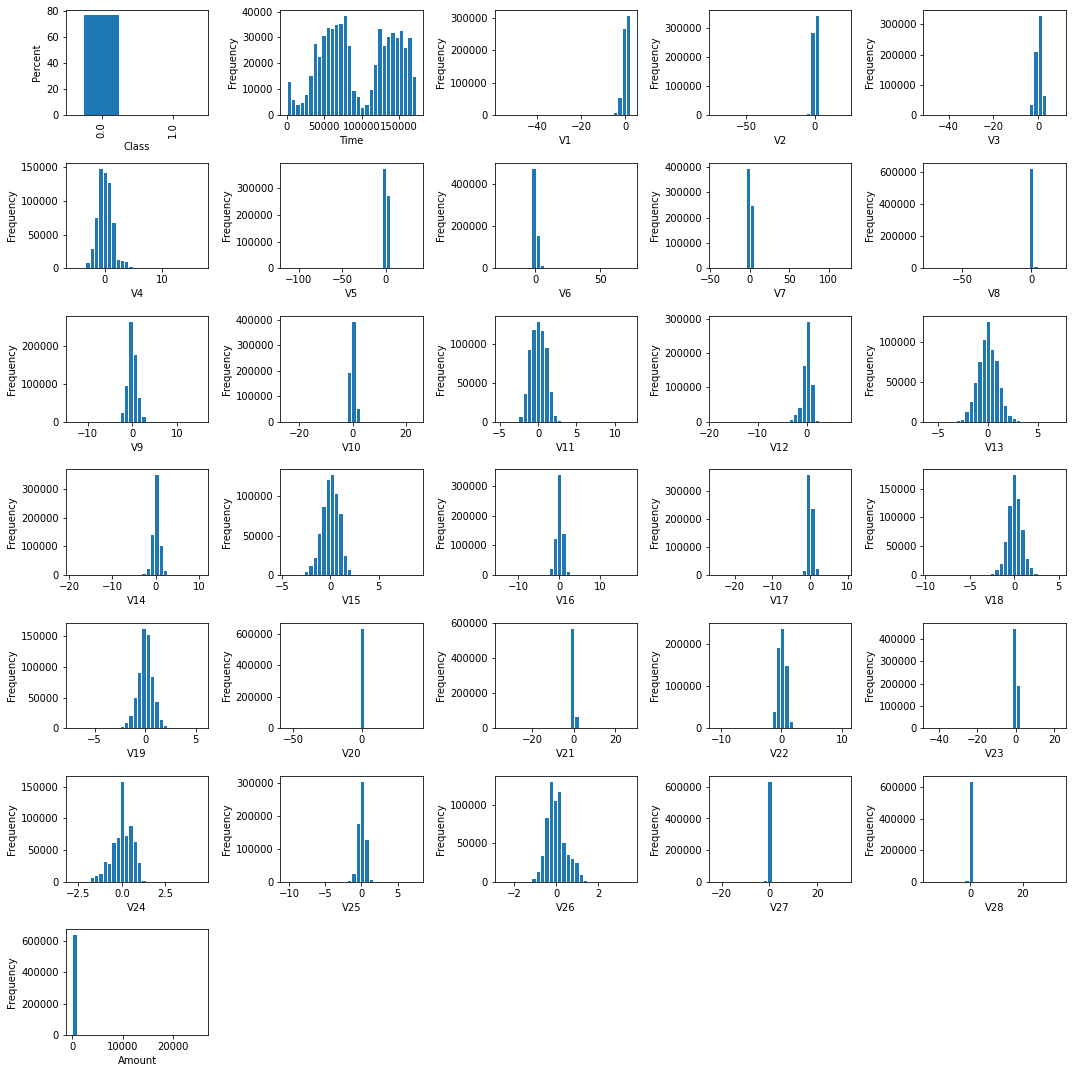

In [26]:
fig, axes = plt.subplots(7, 5, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(categorical):
    (100* df[col].value_counts() / len(df)).plot.bar(ax = axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percent')
    
for i, col in enumerate(numerical):
    j = i+len(categorical)
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
for ax in axes[j+1:]:
    ax.axis('off')
    
plt.tight_layout()

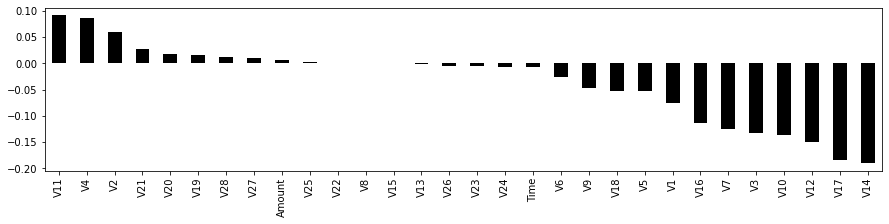

In [27]:
df.corr()['Class'].sort_values(ascending=False)[1:].plot.bar(figsize=(15,3), cmap='copper')
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(columns='Class')
y = df['Class']

features = X.columns.values

Scaler = MinMaxScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_valid_pred = model_lr.predict(X_valid)

print("Training score: ", metrics.f1_score(y_train, y_train_pred))
print("Validation score: ", metrics.f1_score(y_valid, y_valid_pred))

Training score:  0.36
Validation score:  0.31843575418994413


In [31]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print("Training score: ", metrics.f1_score(y_train, y_train_pred))
print("Validation score: ", metrics.f1_score(y_valid, y_valid_pred))

Training score:  0.970566037735849
Validation score:  0.5364705882352941


In [35]:
final_model = XGBClassifier()
model.fit(X, y)
print("Training score: ", metrics.f1_score(y, model.predict(X)))
y_test_pred = model.predict(X_test)

Training score:  0.9098128190584232


In [36]:
output = pd.DataFrame({'id': ids, 'Class': y_test_pred})

In [37]:
output.to_csv("Submission.csv", index=False)